Use shift-enter to execute a code block and move to the next one.

In [2]:
# 1.1 Import tensorflow and other libraries.
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

/Users/abhisheksharma/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


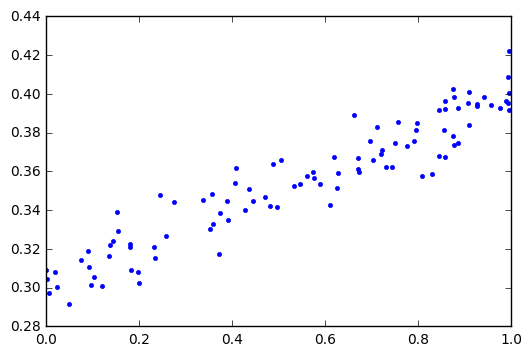

In [3]:
# 1.2 Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_data, y_data, '.')

In [4]:
# 1.3 Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0), name="weights")
b = tf.Variable(tf.zeros([1]), name="biases")
y = W * x_data + b

# Uncomment the following lines to see W and b are.
print(W.name)
#print(b.name)

weights:0


In [5]:
# 1.4 Build training graph.
loss = tf.reduce_mean(tf.square(y - y_data))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.
init = tf.initialize_all_variables()  # Create an operation initializes all the variables.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
print(init)

('loss:', <tf.Tensor 'Mean:0' shape=() dtype=float32>)
('optimizer:', <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x1162617d0>)
('train:', <tensorflow.python.framework.ops.Operation object at 0x116524510>)
name: "init"
op: "NoOp"
input: "^weights/Assign"
input: "^biases/Assign"



In [13]:
# 1.5 Uncomment the following line to see what we have built.
print(tf.get_default_graph().as_graph_def())

node {
  name: "random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "random_uniform/max"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "random_uniform/RandomUniform"
  op: "RandomUniform"
  input: "random_uniform/shape"
  attr {
    key: "T"
    value {
    

In [7]:
# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)  # Save initial values for plotting later.

# Uncomment the following line to see the initial W and b values.
print(sess.run([W, b]))

[array([ 0.56181514], dtype=float32), array([ 0.], dtype=float32)]


In [8]:
# 1.7 Perform training.
for step in range(201):
    sess.run(train)
    #Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([W, b]))

print(sess.run([W, b]))

(0, [array([ 0.54347813], dtype=float32), array([ 0.04767307], dtype=float32)])
(20, [array([ 0.19534796], dtype=float32), array([ 0.24402305], dtype=float32)])
(40, [array([ 0.11832104], dtype=float32), array([ 0.28945741], dtype=float32)])
(60, [array([ 0.10108326], dtype=float32), array([ 0.29962516], dtype=float32)])
(80, [array([ 0.09722562], dtype=float32), array([ 0.30190057], dtype=float32)])
(100, [array([ 0.09636232], dtype=float32), array([ 0.3024098], dtype=float32)])
(120, [array([ 0.09616911], dtype=float32), array([ 0.30252376], dtype=float32)])
(140, [array([ 0.0961259], dtype=float32), array([ 0.30254924], dtype=float32)])
(160, [array([ 0.09611622], dtype=float32), array([ 0.30255497], dtype=float32)])
(180, [array([ 0.09611404], dtype=float32), array([ 0.30255625], dtype=float32)])
(200, [array([ 0.09611356], dtype=float32), array([ 0.30255651], dtype=float32)])
[array([ 0.09611356], dtype=float32), array([ 0.30255651], dtype=float32)]


(0, 1.0)

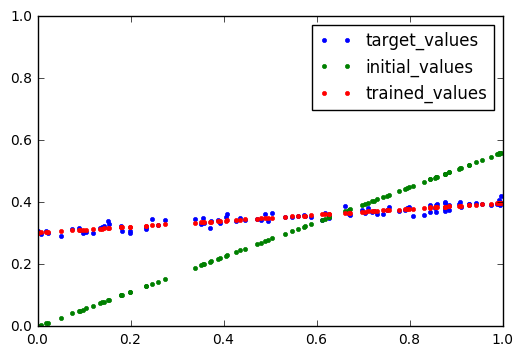

In [9]:
# 1.8 Uncomment the following lines to compare.
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, sess.run(y), ".", label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)

<p>Back to [0_tf_hello_world.ipynb](0_tf_hello_world.ipynb).</p>
<p>Next to [2_mnist.ipynb](2_mnist.ipynb).</p>